In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os
df = pd.read_csv("D:\Data Science\Final Project\Cardio Project/cardio_train.csv")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# General info about data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 decimal number (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field. 

In [3]:
# Are there any `NA`s or missing values in a dataset?
df.isnull().values.any()

False

In [4]:
df.duplicated().sum()

0

In [5]:
#removing Outliers
# Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [6]:
df = df.reset_index()

In [7]:
# to remove values more than 1.5 times the Inter Quartile Range (IQR) variable values
def outliers_iqr(ys):
    quartile1, quartile3 = np.percentile(ys, [25,75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr*3)
    upper_bound = quartile3 + (iqr*3)
    
    print(f'Q1:{quartile1}, Q3:{quartile3}, IQR:{iqr}')
    print(f'Lower Bound:{lower_bound}, Upper Bound:{upper_bound}')
    
    result = np.where((ys > upper_bound) | (ys < lower_bound))
    boundary = (lower_bound, upper_bound)
    
    print(f'Number of outliers: {len(result[0])}')
    
    return result, boundary

In [8]:
height_outlier_index = list(outliers_iqr(df['height'])[0][0])
df_height_outlier = df.iloc[height_outlier_index,:]
df_height_outlier

Q1:160.0, Q3:169.0, IQR:9.0
Lower Bound:133.0, Upper Bound:196.0
Number of outliers: 0


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [9]:
weight_outlier_index = list(outliers_iqr(df['weight'])[0][0])
df_weight_outlier = df.iloc[weight_outlier_index,:]
df_weight_outlier

Q1:65.0, Q3:80.0, IQR:15.0
Lower Bound:20.0, Upper Bound:125.0
Number of outliers: 0


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [10]:
ap_hi_outlier_index = list(outliers_iqr(df['ap_hi'])[0][0])
df_aphi_outlier = df.iloc[ap_hi_outlier_index,:]
df_aphi_outlier

Q1:120.0, Q3:135.0, IQR:15.0
Lower Bound:75.0, Upper Bound:180.0
Number of outliers: 0


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [11]:
ap_lo_outlier_index = list(outliers_iqr(df['ap_lo'])[0][0])
df_aplo_outlier = df.iloc[ap_lo_outlier_index,:]
df_aplo_outlier

Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 0


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [12]:
all_outlier_index = height_outlier_index + weight_outlier_index + ap_hi_outlier_index + ap_lo_outlier_index
all_outlier_index = list(set(all_outlier_index))
print(len(all_outlier_index))

0


In [13]:
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60137,69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
60138,69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
60139,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
60140,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [14]:
df = df.drop(index = all_outlier_index).reset_index()
df

,level_0,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60137,60137,69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
60138,60138,69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
60139,60139,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
60140,60140,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
df.drop(columns=['index','id'], inplace=True)

In [16]:
df

,level_0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60137,60137,19699,1,172,70.0,130,90,1,1,0,0,1,1
60138,60138,21074,1,165,80.0,150,80,1,1,0,0,1,1
60139,60139,19240,2,168,76.0,120,80,1,1,1,0,1,0
60140,60140,22431,1,163,72.0,135,80,1,2,0,0,0,1


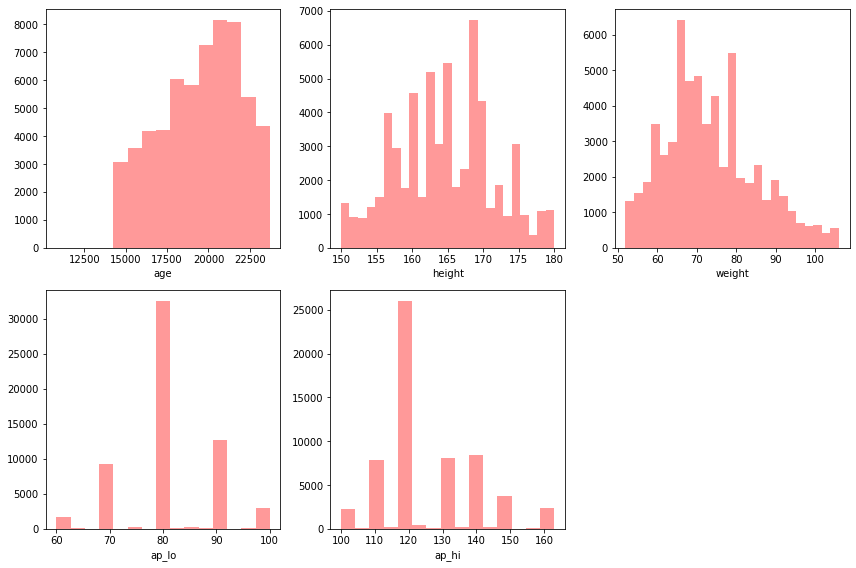

In [17]:
# understand continous variable distribution


figure3 = plt.figure(figsize = (12,8))


plt.subplot(2,3,1)
sns.distplot(df['age'], bins=15, kde=False, color="red")

plt.subplot(2,3,2)
sns.distplot(df['height'], bins=25, kde=False, color="red")

plt.subplot(2,3,3)
sns.distplot(df['weight'], bins=25, kde=False, color="red")

plt.subplot(2,3,4)
sns.distplot(df['ap_lo'], bins=15, kde=False, color="red")

plt.subplot(2,3,5)
sns.distplot(df['ap_hi'], bins=15, kde=False, color="red")

plt.tight_layout()
    
plt.show()

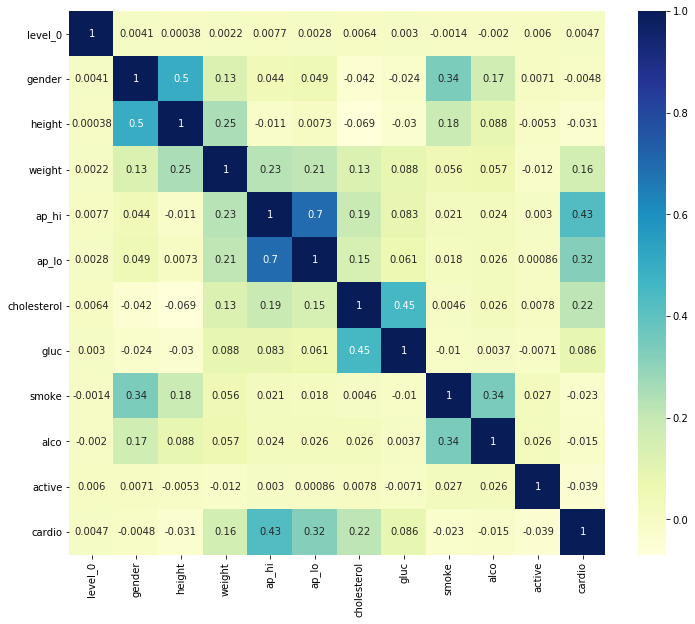

In [18]:
#Looking into the correlation heatmap, and it seems like our target has higher correlation with age, weight, ap_hi, ap_lo, cholestrol.
sns.heatmap(df.drop(columns=['age']).corr(), annot=True, cmap='YlGnBu')
fig = plt.gcf()
fig.set_size_inches(12,10)

# Transforming Data

In [19]:
# transforming the column AGE(measured in days) for Years
df['years'] = (df['age'] / 365).round().astype('int')
df.drop(['age'], axis='columns', inplace=True)

In [20]:
df['years'].describe()

count    60142.000000
mean        53.338798
std          6.746864
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: years, dtype: float64

In [21]:
# age_bin in quinquenium 5 years spam
df['age_bin'] = pd.cut(df['years'], [0,30,40,50,60,70], 
                              labels=['0', '1','2','3','4'])

## 1.3.2 Transforming the column bmi in Body Mass Index Classes (1 to 6)

In [22]:
# Adding Body Mass Index
df['bmi'] = df['weight']/((df['height']/100)**2)

In [23]:
df['bmi'].describe()

count    60142.000000
mean        27.170628
std          4.404588
min         16.049383
25%         23.875115
50%         26.259585
75%         29.752066
max         46.666667
Name: bmi, dtype: float64

In [24]:
# transforming the column bmi in Body Mass Index Classes (1 to 6)
rating = []
for row in df['bmi']:
    if row < 18.5 :    rating.append(1) #UnderWeight
    elif row > 18.5 and row  < 24.9:   rating.append(2)#NormalWeight
    elif row > 24.9 and row < 29.9:  rating.append(3)#OverWeight
    elif row > 29.9 and row < 34.9:  rating.append(4)#ClassObesity_1
    elif row > 34.9 and row < 39.9:  rating.append(5)#ClassObesity_2
    elif row > 39.9 and row < 49.9:  rating.append(6)#ClassObesity_3
    elif row > 49.9:  rating.append('Error')
        
    else:           rating.append('Not_Rated')

In [25]:
# inserting Column
df['BMI_Class'] = rating

In [26]:
# general distribuition
df["BMI_Class"].value_counts(normalize=True)

3    0.391773
2    0.361943
4    0.179209
5    0.055801
6    0.009162
1    0.002112
Name: BMI_Class, dtype: float64

## Creating the column MAP

In [27]:
# creating a Column for MAP
df['MAP'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

In [28]:
#Creating Classes for MAP
map_values = []
for row in df['MAP']:
    if row < 69.9:    map_values.append(1) #Low
    elif row > 70 and row  < 79.9:   map_values.append(2)#Normal
    elif row > 79.9 and row < 89.9:  map_values.append(3)#Normal
    elif row > 89.9 and row < 99.9:  map_values.append(4)#Normal
    elif row > 99.9 and row < 109.9:  map_values.append(5)#High
    elif row > 109.9 and row < 119.9:  map_values.append(6)#Normal
    elif row > 119.9:  map_values.append(7)
        
    else:           map_values.append('Not_Rated')

In [29]:
#inserting MAP_Class Column
df['MAP_Class'] = map_values

In [30]:
# Reordering Columns
df= df[["gender","height","weight","bmi","ap_hi","ap_lo","MAP","years","age_bin","BMI_Class","MAP_Class","cholesterol","gluc","smoke","active","cardio"]]
df.head()

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,years,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,50,2,2,4,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,55,3,5,5,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,52,3,2,4,3,1,0,0,1
3,2,169,82.0,28.710479,150,100,116.666667,48,2,3,6,1,1,0,1,1
4,1,156,56.0,23.011177,100,60,73.333333,48,2,2,2,1,1,0,0,0


# Data Preparation

In [31]:
df.dtypes

gender            int64
height            int64
weight          float64
bmi             float64
ap_hi             int64
ap_lo             int64
MAP             float64
years             int32
age_bin        category
BMI_Class         int64
MAP_Class         int64
cholesterol       int64
gluc              int64
smoke             int64
active            int64
cardio            int64
dtype: object

In [32]:
# only Categorical Data Columns DataFrame
cat_columns = ["age_bin"]

In [33]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df[cat_columns] = le.fit_transform(df[cat_columns])
# df.head()

In [34]:
df

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,years,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,50,2,2,4,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,55,3,5,5,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,52,3,2,4,3,1,0,0,1
3,2,169,82.0,28.710479,150,100,116.666667,48,2,3,6,1,1,0,1,1
4,1,156,56.0,23.011177,100,60,73.333333,48,2,2,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60137,1,172,70.0,23.661439,130,90,103.333333,54,3,2,5,1,1,0,1,1
60138,1,165,80.0,29.384757,150,80,103.333333,58,3,3,5,1,1,0,1,1
60139,2,168,76.0,26.927438,120,80,93.333333,53,3,3,4,1,1,1,1,0
60140,1,163,72.0,27.099251,135,80,98.333333,61,4,3,4,1,2,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
X = df.drop(columns=['cardio', 'bmi', 'MAP','MAP_Class']).values
y = df['cardio']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45106, 12)
(45106,)
(15036, 12)
(15036,)


In [37]:
y_train.dtype

dtype('int64')

In [38]:
# fitting df data to the model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# print(logreg1.intercept_)
# print(logreg1.coef_)

y_log = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_log))

Accuracy: 0.7175445597233306


In [39]:


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train)

y_rf = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_rf))

Accuracy: 0.7213354615589253


In [40]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_dt = decision_tree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_dt))

Accuracy: 0.626562915669061


In [41]:
import joblib
joblib.dump(clf,'model h5')

['model h5']

In [42]:
import pickle
pickle.dump(clf, open("./my_model.pkl", 'wb'))
loaded_model = pickle.load(open('my_model.pkl', 'rb'))